# Problem statement and Business Case

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

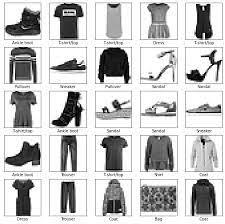

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv", sep=',')
fashion_test_df = pd.read_csv("fashion-mnist_test.csv", sep=',')

In [3]:
fashion_train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization of data

In [4]:
fashion_test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.tail(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

1.0

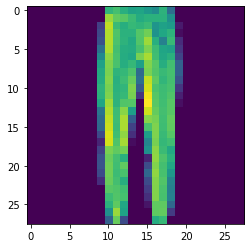

In [9]:
import random

i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

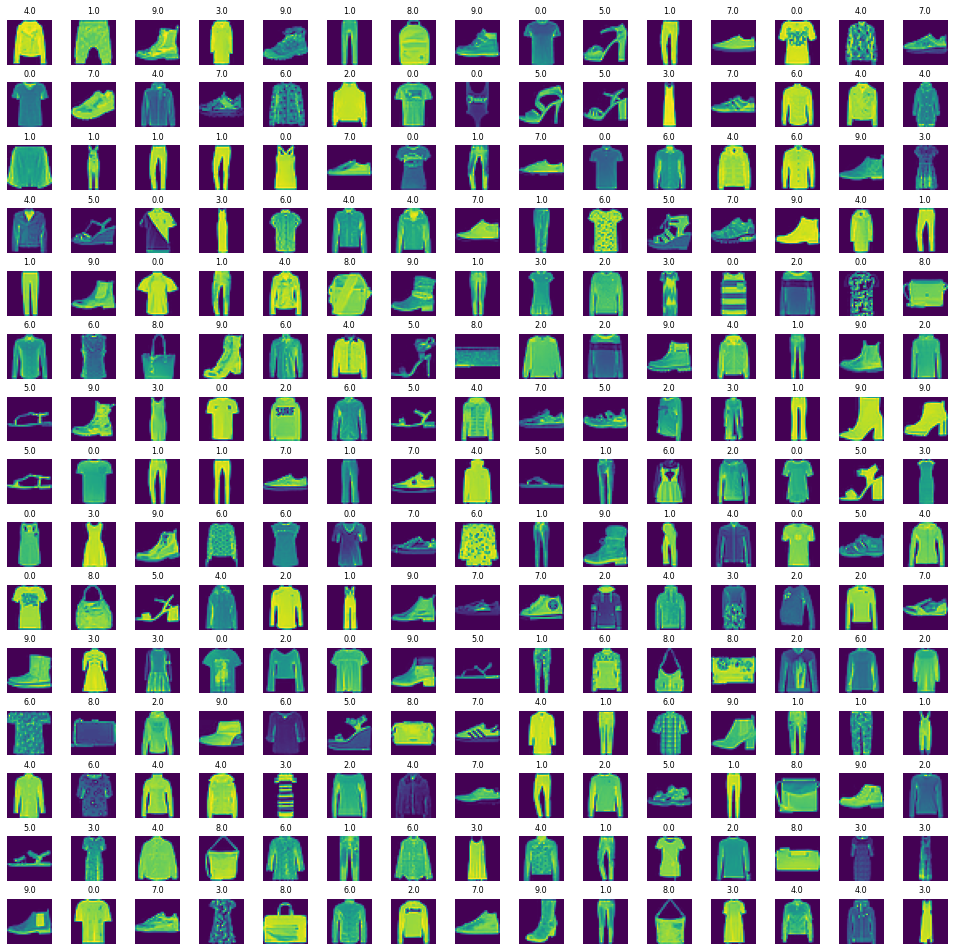

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Training the model

In [11]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [12]:
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [14]:
X_train = X_train.reshape(X_train.shape[0], * (28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28,28,1))
X_test = X_test.reshape(X_test.shape[0], * (28,28,1))

In [15]:
X_train.shape

(48000, 28, 28, 1)

In [16]:
X_validate.shape

(12000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
import keras

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='sigmoid'))
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [33]:
epoch=50
cnn_model.fit(X_train,
    y_train,
    batch_size=512,
    epochs=epoch,
    verbose=1,
    validation_data=(X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 4s 32ms/step - loss: 1.3986 - accuracy: 0.5752 - val_loss: 0.7948 - val_accuracy: 0.7227
Epoch 2/50
94/94 [==============================] - 2s 21ms/step - loss: 0.7022 - accuracy: 0.7459 - val_loss: 0.6517 - val_accuracy: 0.7624
Epoch 3/50
94/94 [==============================] - 2s 19ms/step - loss: 0.6100 - accuracy: 0.7789 - val_loss: 0.5863 - val_accuracy: 0.7869
Epoch 4/50
94/94 [==============================] - 2s 20ms/step - loss: 0.5636 - accuracy: 0.7952 - val_loss: 0.5506 - val_accuracy: 0.8035
Epoch 5/50
94/94 [==============================] - 3s 27ms/step - loss: 0.5314 - accuracy: 0.8083 - val_loss: 0.5230 - val_accuracy: 0.8150
Epoch 6/50
94/94 [==============================] - 3s 35ms/step - loss: 0.5109 - accuracy: 0.8151 - val_loss: 0.5033 - val_accuracy: 0.8237
Epoch 7/50
94/94 [==============================] - 2s 18ms/step - loss: 0.4905 - accuracy: 0.8218 - val_loss: 0.4900 - val_accuracy: 0.8244
Epoch 8/50
94

# Model Evaluation

In [34]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test_accuracy:{}".format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8708
Test_accuracy:0.8708000183105469


In [45]:
y_predict = np.argmax(cnn_model.predict(X_test), axis=1)

313/313 [==============================] - 0s 1ms/step


In [46]:
y_predict

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

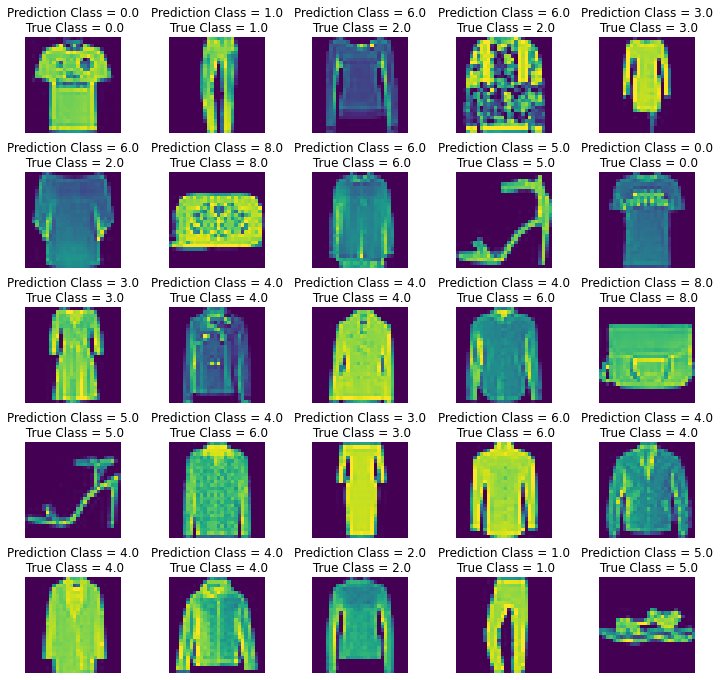

In [47]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

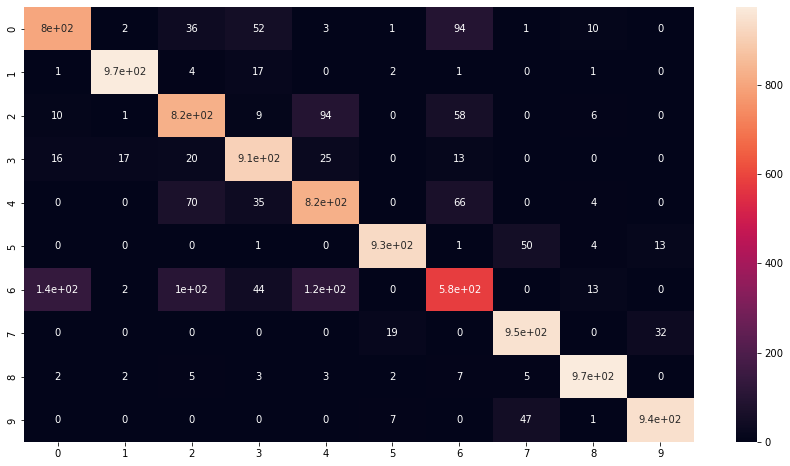

In [54]:
from sklearn.metrics import confusion_matrix, consensus_score, classification_report
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True)

In [55]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.80      0.81      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.78      0.82      0.80      1000
     Class 3       0.85      0.91      0.88      1000
     Class 4       0.77      0.82      0.80      1000
     Class 5       0.97      0.93      0.95      1000
     Class 6       0.71      0.58      0.64      1000
     Class 7       0.90      0.95      0.92      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [56]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Improving the model

In [59]:
#dropout and change the kernel size

cnn_model1 = Sequential()
cnn_model1.add(Conv2D(64,3,3, input_shape=(28,28,1), activation='relu'))

cnn_model1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model1.add(Flatten())
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Dense(64, activation='relu'))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Dense(10, activation='sigmoid'))
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


epoch=50
cnn_model1.fit(X_train,
    y_train,
    batch_size=512,
    epochs=epoch,
    verbose=1,
    validation_data=(X_validate, y_validate))

Epoch 1/50


C:\Users\shubham.rangate\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


94/94 [==============================] - 5s 36ms/step - loss: 1.2237 - accuracy: 0.5841 - val_loss: 0.6785 - val_accuracy: 0.7580
Epoch 2/50
94/94 [==============================] - 2s 17ms/step - loss: 0.6804 - accuracy: 0.7536 - val_loss: 0.5613 - val_accuracy: 0.7989
Epoch 3/50
94/94 [==============================] - 2s 20ms/step - loss: 0.5953 - accuracy: 0.7845 - val_loss: 0.5095 - val_accuracy: 0.8141
Epoch 4/50
94/94 [==============================] - 3s 27ms/step - loss: 0.5494 - accuracy: 0.8005 - val_loss: 0.4786 - val_accuracy: 0.8258
Epoch 5/50
94/94 [==============================] - 3s 28ms/step - loss: 0.5175 - accuracy: 0.8115 - val_loss: 0.4590 - val_accuracy: 0.8317
Epoch 6/50
94/94 [==============================] - 2s 24ms/step - loss: 0.4967 - accuracy: 0.8183 - val_loss: 0.4409 - val_accuracy: 0.8388
Epoch 7/50
94/94 [==============================] - 3s 34ms/step - loss: 0.4799 - accuracy: 0.8237 - val_loss: 0.4278 - val_accuracy: 0.8434
Epoch 8/50
94/94 [======

In [60]:
evaluation1 = cnn_model1.evaluate(X_test,y_test)
print("Test_accuracy:{}".format(evaluation1[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8858
Test_accuracy:0.8858000040054321


### Hence, We can see that the Test accuracy has benn improved a bit after adding some dropout at hidden layers